In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.seterr(divide="ignore") # ingnore warning of zero division

# initial solution you would like to start
x = 2
y = 1

# Himmelblau function
z = ((x**2 + y - 11)**2 + (x + y**2 - 7)**2)

print("Initial guess: x = {}, y = {}, z = {}".format(x, y, z))

Initial guess: x = 2, y = 1, z = 52


In [2]:
# Hyperparameters
T0 = 100  # initial temperature
temp_for_plot = T0
M = 100
N = 15
alpha = 0.85

k = 0.1

In [3]:
# optimization loops
temp = [] # to plot the temperature
obj_val = [] # to plot the objective value reached at the end of o each m
m_memory = [] # to store m values

for i in range(M): # how many times decrease temperature
    for j in range(N): #how many times seach neighbors 

        # for decision variable x
        rand_numb_x_1 = np.random.rand()
        rand_numb_x_2 = np.random.rand()

        if rand_numb_x_1 > 0.5: #greater than 0.5, increase
            step_size_x = k * rand_numb_x_2
        else:
            step_size_x = -k * rand_numb_x_2

        # for decision variable y
        rand_numb_y_1 = np.random.rand()
        rand_numb_y_2 = np.random.rand()

        if rand_numb_y_1 > 0.5: #greater than 0.5, increase
            step_size_y = k * rand_numb_y_2
        else:
            step_size_y = -k * rand_numb_y_2

        x_temporary = x + step_size_x
        y_temporary = y + step_size_y

        obj_val_possible = ((x_temporary**2 + y_temporary - 11)**2 + (x_temporary + y_temporary**2 - 7)**2)

        obj_val_current = ((x**2 + y - 11)**2 + (x + y**2 - 7)**2)

        rand_num = np.random.rand()

        formula = np.exp(-(obj_val_possible - obj_val_current) / T0)

        if obj_val_possible <= obj_val_current: # if the new solution is better, accept it
            x = x_temporary
            y = y_temporary
        elif rand_num <= formula:
            x = x_temporary
            y = y_temporary
        else:
            x = x
            y = y
    
    temp.append(T0)
    obj_val.append(obj_val_current)
    T0 = alpha * T0
    m_memory.append(i)
    print("Iteration {}: x = {:.5f}, y = {:.5f}, z = {:.5f}, T = {:.5f}".format(i+1, x, y, obj_val_current, T0))


Iteration 1: x = 2.14184, y = 1.23618, z = 40.82224, T = 85.00000
Iteration 2: x = 1.62354, y = 1.40411, z = 57.82923, T = 72.25000
Iteration 3: x = 2.08032, y = 1.66417, z = 26.81828, T = 61.41250
Iteration 4: x = 1.86685, y = 1.13936, z = 55.41774, T = 52.20063
Iteration 5: x = 1.76978, y = 1.23728, z = 57.45497, T = 44.37053
Iteration 6: x = 1.85547, y = 0.97590, z = 55.21363, T = 37.71495
Iteration 7: x = 2.01238, y = 0.89565, z = 46.18437, T = 32.05771
Iteration 8: x = 2.25374, y = 0.84812, z = 43.93416, T = 27.24905
Iteration 9: x = 2.39684, y = 1.15611, z = 32.63091, T = 23.16169
Iteration 10: x = 2.13139, y = 1.06545, z = 43.35530, T = 19.68744
Iteration 11: x = 2.22917, y = 1.01235, z = 36.34088, T = 16.73432
Iteration 12: x = 2.35545, y = 1.10099, z = 32.47372, T = 14.22418
Iteration 13: x = 2.58288, y = 1.50062, z = 18.07287, T = 12.09055
Iteration 14: x = 2.78273, y = 1.63435, z = 5.83013, T = 10.27697
Iteration 15: x = 2.77069, y = 1.54119, z = 7.71658, T = 8.73542
Iterati

Final solution: x = 2.99523, y = 2.00406, z = 0.00073


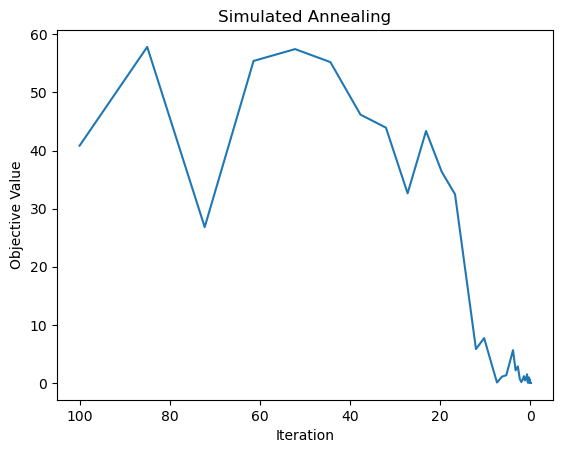

In [4]:
# print optimization history
print("Final solution: x = {:.5f}, y = {:.5f}, z = {:.5f}".format(x, y, obj_val_current))
plt.plot(temp, obj_val)
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.title("Simulated Annealing")
plt.gca().invert_xaxis()
plt.show()